In [203]:
import pandas as pd 
import glob
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [204]:
path_to_xlsx = 'G:\\My Drive\\DataFiles\\Full_Image_List_6.5.24\\all_elements_with_part_type.xlsx'

In [205]:
df = pd.read_excel(path_to_xlsx)

In [207]:
# Step 1: Replace NaN values with empty string and convert to string type
df['keywords'] = df['keywords'].fillna('').astype(str)

# Step 2: Split the 'keywords' column into lists where ';' is the separator
df['keywords'] = df['keywords'].str.split(';')

# Step 3: Explode the DataFrame to create a new row for each item in the lists
df_exploded = df.explode('keywords').reset_index(drop=True)

In [208]:
# List of keywords to check
keywords_to_check = [
    'SK_1.1 Sphere defined',
    'CK_Additions on Definitions of the Sphere',
    'CK_Definition of Sphere by Theodosius',
    'CK_Definition of Sphere by Euclid',
    'CK_Introduction to Geometry'
]

# Check if keywords are present
present_keywords = set(df_exploded['keywords']).intersection(keywords_to_check)

print("Keywords present in DataFrame:")
print(present_keywords)

Keywords present in DataFrame:
{'CK_Additions on Definitions of the Sphere', 'CK_Introduction to Geometry', 'SK_1.1 Sphere defined', 'CK_Definition of Sphere by Euclid', 'CK_Definition of Sphere by Theodosius'}


In [209]:
# Filter the DataFrame
df_filtered = df_exploded[df_exploded['keywords'].isin(keywords_to_check)]

In [210]:
df_filtered

,Unnamed: 0,images,keywords,cluster_name,authors,publishers,printers,place,year,bid,book,part_or_adaption,part_or_adaption_label,pagenum,bb,part_type
89,23,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,SK_1.1 Sphere defined,SIL_00530,"Sacrobosco, Johannes de","Landsberg, Martin","Landsberg, Martin",Leipzig,1486,1616,http://sphaera.mpiwg-berlin.mpg.de/id/item/c14...,http://sphaera.mpiwg-berlin.mpg.de/id/part/c61...,Tractatus de sphaera,5,"xywh=143,689,491,496",100
90,23,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,CK_Definition of Sphere by Theodosius,SIL_00530,"Sacrobosco, Johannes de","Landsberg, Martin","Landsberg, Martin",Leipzig,1486,1616,http://sphaera.mpiwg-berlin.mpg.de/id/item/c14...,http://sphaera.mpiwg-berlin.mpg.de/id/part/c61...,Tractatus de sphaera,5,"xywh=143,689,491,496",100
91,23,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,CK_Definition of Sphere by Euclid,SIL_00530,"Sacrobosco, Johannes de","Landsberg, Martin","Landsberg, Martin",Leipzig,1486,1616,http://sphaera.mpiwg-berlin.mpg.de/id/item/c14...,http://sphaera.mpiwg-berlin.mpg.de/id/part/c61...,Tractatus de sphaera,5,"xywh=143,689,491,496",100
208,52,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,SK_1.1 Sphere defined,SIL_00975,"Sacrobosco, Johannes de;Borro, Gasparino","Scoto I., Ottaviano","Locatello, Boneto",Venice,1494,1622,http://sphaera.mpiwg-berlin.mpg.de/id/item/b8e...,http://sphaera.mpiwg-berlin.mpg.de/id/part/255...,Section: Construction of an armillary sphere b...,7,"xywh=3016,1327,331,556",other
210,52,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,CK_Definition of Sphere by Euclid,SIL_00975,"Sacrobosco, Johannes de;Borro, Gasparino","Scoto I., Ottaviano","Locatello, Boneto",Venice,1494,1622,http://sphaera.mpiwg-berlin.mpg.de/id/item/b8e...,http://sphaera.mpiwg-berlin.mpg.de/id/part/255...,Section: Construction of an armillary sphere b...,7,"xywh=3016,1327,331,556",other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79662,21007,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,CK_Definition of Sphere by Theodosius,SIL_01935,"Hill, Thomas","Jaggard, William","Judson, Thomas",London,1599,2279,http://sphaera.mpiwg-berlin.mpg.de/id/item/e70...,http://sphaera.mpiwg-berlin.mpg.de/id/part/1e2...,First part of the Sphere treatise of Thomas Hill,6,"xywh=1708,381,345,337",influenced_100
79891,21078,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,SK_1.1 Sphere defined,SIL_01618,"Sacrobosco, Johannes de;Vinet, Élie;Hero, Albe...","Bellère, Jean","Bellère, Jean",Antwerp,1582,2281,http://sphaera.mpiwg-berlin.mpg.de/id/item/af4...,http://sphaera.mpiwg-berlin.mpg.de/id/adaption...,Giuntini's and new Vinet's commentary on the S...,25,"xywh=677,228,540,540",adaption_100
79892,21078,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,CK_Definition of Sphere by Euclid,SIL_01618,"Sacrobosco, Johannes de;Vinet, Élie;Hero, Albe...","Bellère, Jean","Bellère, Jean",Antwerp,1582,2281,http://sphaera.mpiwg-berlin.mpg.de/id/item/af4...,http://sphaera.mpiwg-berlin.mpg.de/id/adaption...,Giuntini's and new Vinet's commentary on the S...,25,"xywh=677,228,540,540",adaption_100
79895,21079,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,SK_1.1 Sphere defined,SIL_01567,"Sacrobosco, Johannes de;Vinet, Élie;Hero, Albe...","Bellère, Jean","Bellère, Jean",Antwerp,1582,2281,http://sphaera.mpiwg-berlin.mpg.de/id/item/af4...,http://sphaera.mpiwg-berlin.mpg.de/id/adaption...,Giuntini's and new Vinet's commentary on the S...,25,"xywh=134,222,534,542",adaption_100


C:\Users\nogas\AppData\Local\Temp\ipykernel_1244\4121299647.py:24: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_grouped, x='year_interval', y='unique_images', hue='part_type', marker='o', ci=None,


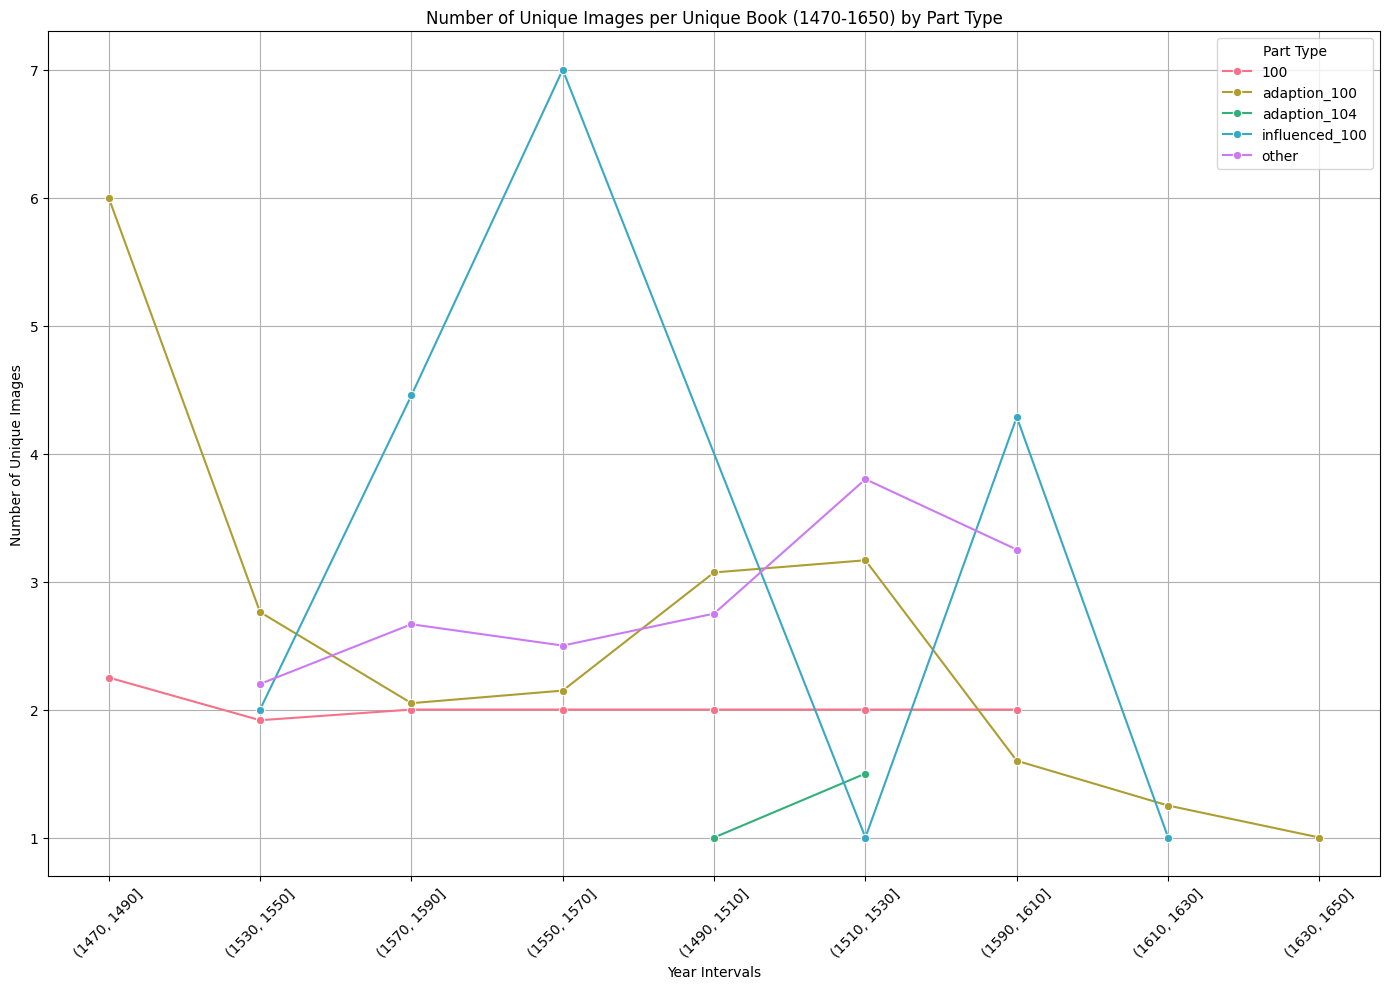

In [211]:
# Assuming 'filtered_df' is your filtered DataFrame with columns: images, part_type, book, year, keywords

# Define the keywords of interest
keywords_of_interest = [
    'CK_Definition of Sphere by Theodosius',
    'CK_Definition of Sphere by Euclid'
]

# Filter for the specified keywords
df_filtered_keywords = df_filtered[df_filtered['keywords'].isin(keywords_of_interest)].copy()

# Define 20-year intervals from 1470 to 1650
year_intervals = range(1470, 1651, 20)

# Bin the 'year' column into intervals
df_filtered_keywords['year_interval'] = pd.cut(df_filtered_keywords['year'], bins=year_intervals)
df_filtered_keywords['year_interval'] = df_filtered_keywords['year_interval'].astype(str)

# Aggregate to find unique images per unique book per part_type per year interval
df_grouped = df_filtered_keywords.groupby(['part_type', 'book', 'year_interval']).size().reset_index(name='unique_images')

# Plotting
plt.figure(figsize=(14, 10))
sns.lineplot(data=df_grouped, x='year_interval', y='unique_images', hue='part_type', marker='o', ci=None,
             palette='husl')

plt.title('Number of Unique Images per Unique Book (1470-1650) by Part Type')
plt.xlabel('Year Intervals')
plt.ylabel('Number of Unique Images')
plt.legend(title='Part Type')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [212]:
path_to_xlsx1 = 'G:\\My Drive\\DataFiles\\Full_Image_List_6.5.24\\all_elements_all_ck_ucks.xlsx'

In [213]:
df1 = pd.read_excel(path_to_xlsx1)

In [214]:
df1

,Unnamed: 0,images,label,uck,level
0,0,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,SIL_00113,MTK_Lunar Eclipse_Group_01,0
1,1,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,SIL_00113,MTK_Lunar Eclipse_Group_01,0
2,2,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,SIL_00113,MTK_Lunar Eclipse_Group_01,0
3,3,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,SIL_00113,MTK_Lunar Eclipse_Group_01,0
4,4,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,SIL_00113,MTK_Lunar Eclipse_Group_01,0
...,...,...,...,...,...
216961,255197,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,SIL_01573,MVK_Diagrams,0
216962,255198,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,SIL_01604,MVK_Diagrams,0
216963,255199,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,SIL_01604,MVK_Diagrams,0
216964,255200,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,SIL_01607,MTK_Mercury Orbit_Group_01,0


In [215]:

# Filter the DataFrame to include only rows where 'uck' is "Definition of Sphere"
filtered_df = df1[df1['uck'] == "Definition of Sphere"]

# Get the unique labels
unique_labels = filtered_df['label'].unique()

# Create a new DataFrame with these unique labels
df_unique_labels = pd.DataFrame(unique_labels, columns=['label'])


In [216]:
# Save the new DataFrame to an Excel file
df_unique_labels.to_excel('unique_labels.xlsx', index=False)


In [217]:
path_to_xlsx2 = 'G:\\My Drive\\DataFiles\\uck_sphere_definition_sils.xlsx'

In [218]:
df_sphere_definition = pd.read_excel(path_to_xlsx2)

In [219]:
df_sphere_definition

,label,space,time,lines/ color blocks,disproportional decorative elements,lathe machine,double image,titles,index letters,Unnamed: 9
0,SIL_01618,3D,depending on connection,color,yes,yes,NaN,NaN,NaN,NaN
1,SIL_02105,3D,no,color,no,yes,NaN,NaN,NaN,NaN
2,SIL_01811,3D,no,color,no,yes,NaN,NaN,NaN,NaN
3,SIL_01505,"3D, 2D",no,"lines, color",no,"no, yes",yes,NaN,NaN,NaN
4,SIL_01567,3D,depending on connection,color,yes,yes,NaN,NaN,NaN,NaN
5,SIL_02012,3D,depending on connection,color,yes,yes,NaN,NaN,NaN,NaN
6,SIL_02087,3D,depending on connection,color,yes,yes,NaN,NaN,NaN,NaN
7,SIL_02264,2D,depending on connection,color,no,no,NaN,NaN,NaN,NaN
8,SIL_02521,2D,yes,color,no,yes,yes,NaN,NaN,NaN
9,SIL_02542,2D,no,lines,no,no,yes,NaN,NaN,NaN


In [220]:
#df with all the images of sphere definition with their book, year, place, part type

# Merge the dataframes on the cluster columns
merged_df = pd.merge(df, df_sphere_definition, left_on='cluster_name', right_on='label', suffixes=('_df', '_sphere'))

# Create a new dataframe to store the final result
new_df_list = []

# Iterate through each unique image and duplicate clusters
for image in merged_df['images'].unique():
    temp_df = merged_df[merged_df['images'] == image].copy()
    new_df_list.append(temp_df)

# Concatenate all the temporary dataframes to create the final dataframe
new_df = pd.concat(new_df_list, ignore_index=True)

# Select the required columns
new_df = new_df[['images', 'label', 'book', 'year', 'place', 'part_type'] + df_sphere_definition.columns.tolist()[1:]]

# Rename the columns as needed
new_df.rename(columns={'label': 'cluster'}, inplace=True)

In [221]:
new_df

,images,cluster,book,year,place,part_type,space,time,lines/ color blocks,disproportional decorative elements,lathe machine,double image,titles,index letters,Unnamed: 9
0,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,SIL_00530,http://sphaera.mpiwg-berlin.mpg.de/id/item/c14...,1486,Leipzig,100,2D,no,lines,no,no,NaN,NaN,NaN,*one image with both explanations.
1,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,SIL_00975,http://sphaera.mpiwg-berlin.mpg.de/id/item/b8e...,1494,Venice,other,2D,no,lines,no,no,NaN,yes,NaN,"*simples images, varied"
2,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,SIL_00975,http://sphaera.mpiwg-berlin.mpg.de/id/item/b8e...,1494,Venice,adaption_100,2D,no,lines,no,no,NaN,yes,NaN,"*simples images, varied"
3,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,SIL_01224,http://sphaera.mpiwg-berlin.mpg.de/id/item/b8e...,1494,Venice,adaption_100,2D,yes,lines,no,no,NaN,yes,NaN,*not sure about the time issue
4,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,SIL_01935,http://sphaera.mpiwg-berlin.mpg.de/id/item/b8e...,1494,Venice,adaption_100,2D,no,lines,no,no,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,SIL_03519,http://sphaera.mpiwg-berlin.mpg.de/id/item/e70...,1599,London,influenced_100,3D,yes,color,no,yes,yes,NaN,NaN,NaN
727,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,SIL_03576,http://sphaera.mpiwg-berlin.mpg.de/id/item/e70...,1599,London,influenced_100,3D,no,color,no,yes,NaN,NaN,NaN,NaN
728,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,SIL_01935,http://sphaera.mpiwg-berlin.mpg.de/id/item/e70...,1599,London,influenced_100,2D,no,lines,no,no,NaN,NaN,NaN,NaN
729,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,SIL_01618,http://sphaera.mpiwg-berlin.mpg.de/id/item/af4...,1582,Antwerp,adaption_100,3D,depending on connection,color,yes,yes,NaN,NaN,NaN,NaN


C:\Users\nogas\AppData\Local\Temp\ipykernel_1244\2593502534.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df = new_df.groupby(['year_interval', 'part_type', 'book'])['images'].nunique().reset_index()
C:\Users\nogas\AppData\Local\Temp\ipykernel_1244\2593502534.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg_df = grouped_df.groupby(['year_interval', 'part_type'])['images'].sum().reset_index()


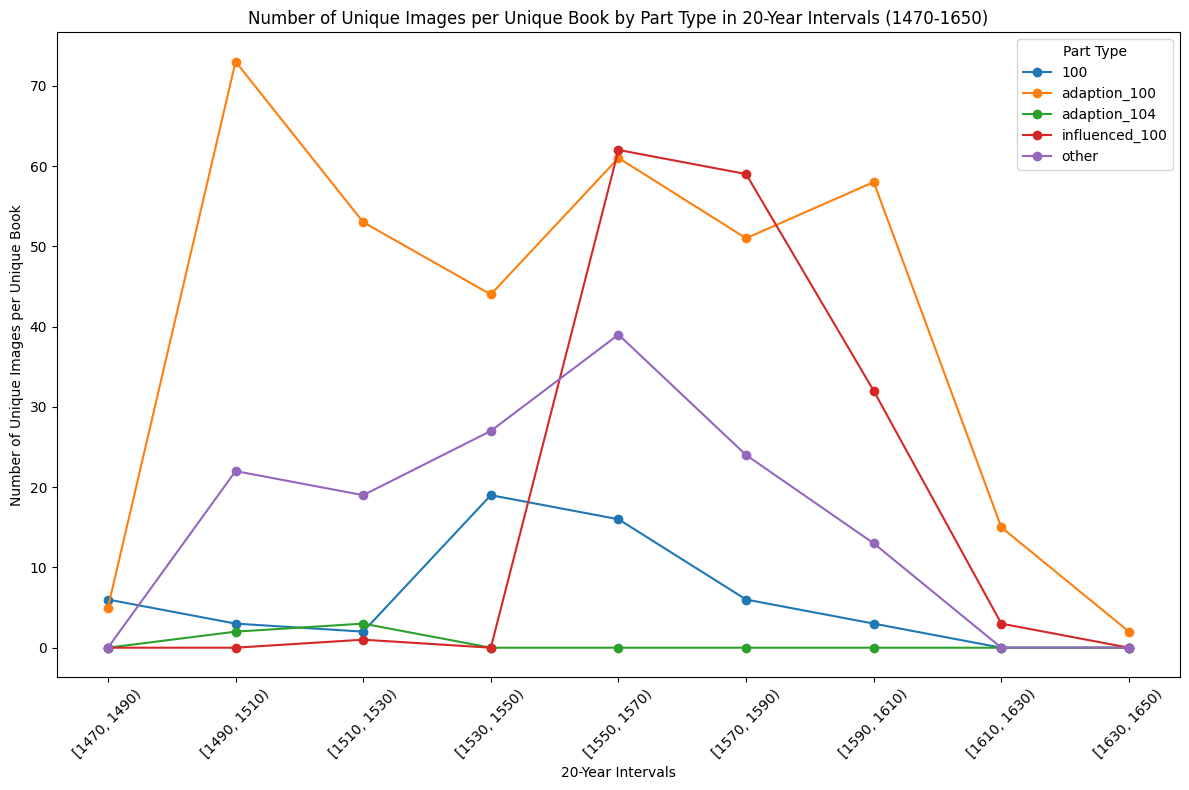

In [222]:
# Define the 20-year intervals
bins = list(range(1470, 1670, 20))

# Bin the year column into 20-year intervals
new_df['year_interval'] = pd.cut(new_df['year'], bins, right=False)

# Group by the binned intervals, part type, and book, then count unique images
grouped_df = new_df.groupby(['year_interval', 'part_type', 'book'])['images'].nunique().reset_index()

# Aggregate by part type and year_interval to get the count of unique images per unique book
agg_df = grouped_df.groupby(['year_interval', 'part_type'])['images'].sum().reset_index()

# Pivot the data to get part types as columns and intervals as rows
pivot_df = agg_df.pivot(index='year_interval', columns='part_type', values='images')

# Plotting
plt.figure(figsize=(12, 8))

for part_type in pivot_df.columns:
    plt.plot(pivot_df.index.astype(str), pivot_df[part_type], marker='o', label=part_type)

plt.xlabel('20-Year Intervals')
plt.ylabel('Number of Unique Images per Unique Book')
plt.title('Number of Unique Images per Unique Book by Part Type in 20-Year Intervals (1470-1650)')
plt.legend(title='Part Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [223]:
unique_books_count = new_df['book'].nunique()
print(f'The number of unique books in new_df is: {unique_books_count}')

The number of unique books in new_df is: 244


In [224]:
unique_images_count = new_df['images'].nunique()
print(unique_images_count)

718


In [225]:
unique_cluster_count = new_df['cluster'].nunique()
print(unique_cluster_count)

57


C:\Users\nogas\AppData\Local\Temp\ipykernel_1244\3462048274.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df = new_df.groupby(['year_interval', 'part_type', 'book']).agg(
C:\Users\nogas\AppData\Local\Temp\ipykernel_1244\3462048274.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg_df = grouped_df.groupby(['year_interval', 'part_type']).agg(


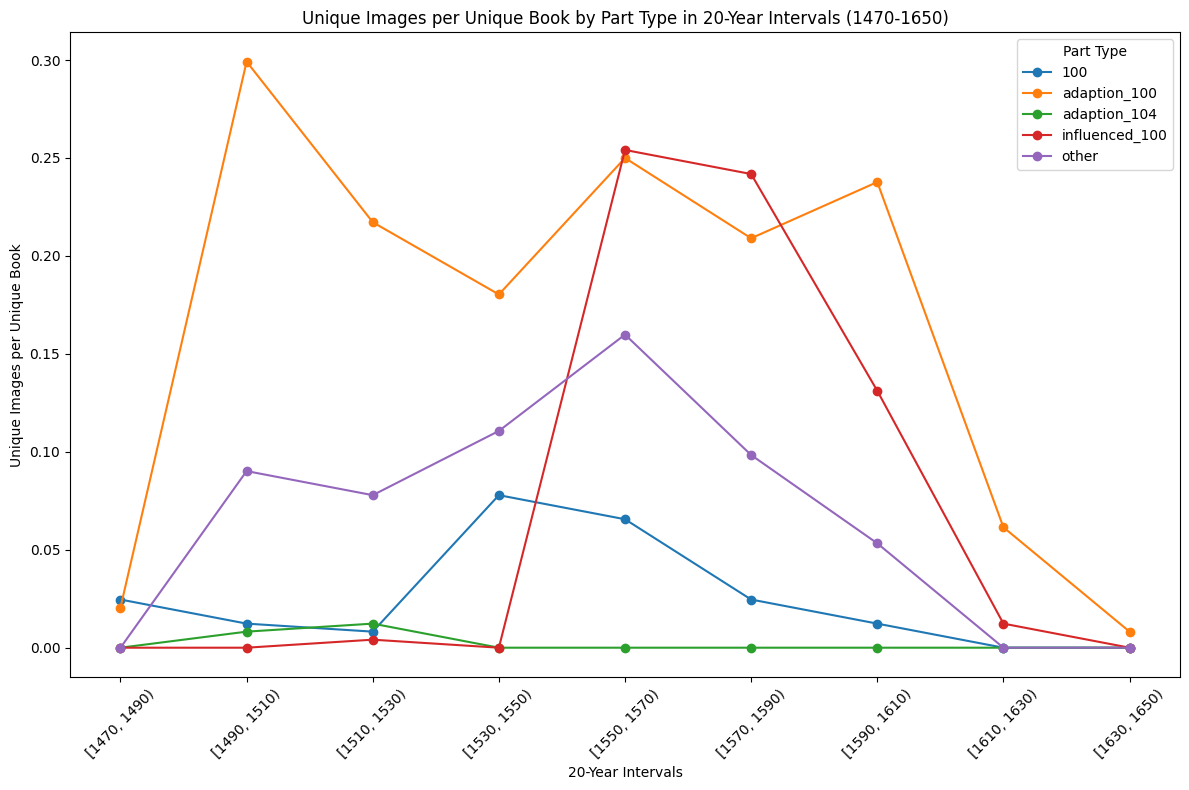

In [226]:
# Define the 20-year intervals
bins = list(range(1470, 1670, 20))

# Bin the year column into 20-year intervals
new_df['year_interval'] = pd.cut(new_df['year'], bins, right=False)

# Group by the binned intervals, part type, and book, then count unique images and unique books
grouped_df = new_df.groupby(['year_interval', 'part_type', 'book']).agg(
    unique_images=('images', 'nunique'),
    unique_books=('book', 'nunique')
).reset_index()

# Aggregate by part type and year_interval to get the count of unique images and unique books
agg_df = grouped_df.groupby(['year_interval', 'part_type']).agg(
    total_unique_images=('unique_images', 'sum'),
    total_unique_books=('book', 'nunique')
).reset_index()

# Calculate the ratio of unique images to unique books
agg_df['images_per_book'] = agg_df['total_unique_images'] / agg_df['total_unique_books']

# Pivot the data to get part types as columns and intervals as rows
pivot_df = agg_df.pivot(index='year_interval', columns='part_type', values='images_per_book')

# Plotting
plt.figure(figsize=(12, 8))

for part_type in pivot_df.columns:
    plt.plot(pivot_df.index.astype(str), pivot_df[part_type], marker='o', label=part_type)

plt.xlabel('20-Year Intervals')
plt.ylabel('Unique Images per Unique Book')
plt.title('Unique Images per Unique Book by Part Type in 20-Year Intervals (1470-1650)')
plt.legend(title='Part Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\nogas\AppData\Local\Temp\ipykernel_1244\1233601667.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = filtered_df.groupby(['part_type', pd.cut(filtered_df['year'], bins)])['images'].nunique().reset_index()


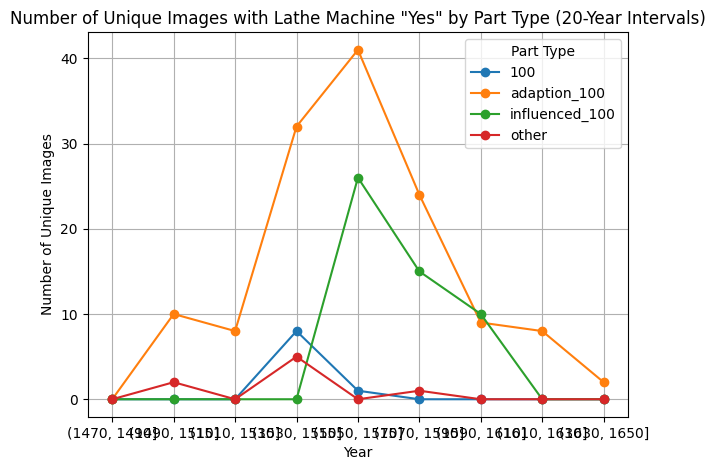

In [227]:
# Filter rows where 'lathe machine' is 'yes'
filtered_df = new_df[new_df['lathe machine'] == 'yes']

# Define the range of years and the interval
start_year = 1470
end_year = 1650
year_interval = 20

# Create bins for 20-year intervals
bins = range(start_year, end_year + year_interval, year_interval)

# Group by 'part_type' and cut 'year' into bins, then count unique 'images'
grouped = filtered_df.groupby(['part_type', pd.cut(filtered_df['year'], bins)])['images'].nunique().reset_index()

# Pivot the data to have 'part_type' as columns and intervals as index
pivot_df = grouped.pivot(index='year', columns='part_type', values='images')

# Plot each 'part_type' as a line
pivot_df.plot(kind='line', marker='o')

# Customize plot labels and title
plt.xlabel('Year')
plt.ylabel('Number of Unique Images')
plt.title('Number of Unique Images with Lathe Machine "Yes" by Part Type (20-Year Intervals)')

# Show the plot
plt.legend(title='Part Type')
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\nogas\AppData\Local\Temp\ipykernel_1244\3089665495.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = filtered_df.groupby(['part_type', pd.cut(filtered_df['year'], bins)])['images'].nunique().reset_index()


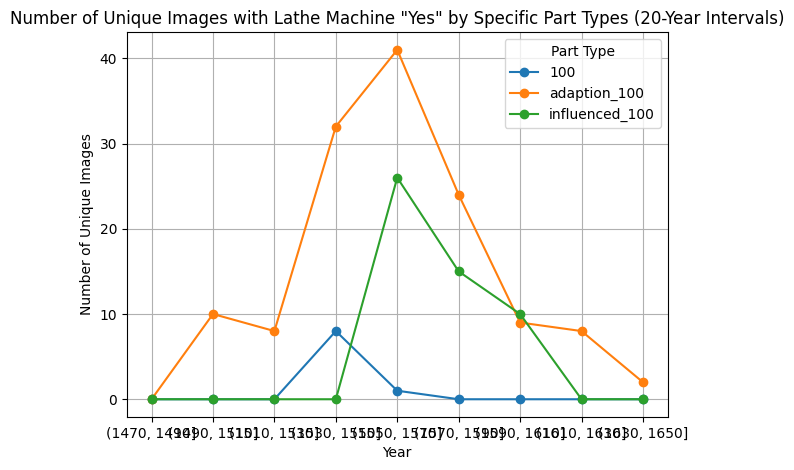

In [228]:
# Filter rows where 'lathe machine' is 'yes'
filtered_df = new_df[new_df['lathe machine'] == 'yes']

# Define the range of years and the interval
start_year = 1470
end_year = 1650
year_interval = 20

# Create bins for 20-year intervals
bins = range(start_year, end_year + year_interval, year_interval)

# Filter to include only specific part_type values
specific_part_types = ['100', 'adaption_100', 'influenced_100']
filtered_df = filtered_df[filtered_df['part_type'].isin(specific_part_types)]

# Group by 'part_type' and cut 'year' into bins, then count unique 'images'
grouped = filtered_df.groupby(['part_type', pd.cut(filtered_df['year'], bins)])['images'].nunique().reset_index()

# Pivot the data to have 'part_type' as columns and intervals as index
pivot_df = grouped.pivot(index='year', columns='part_type', values='images')

# Plot each 'part_type' as a line
pivot_df.plot(kind='line', marker='o')

# Customize plot labels and title
plt.xlabel('Year')
plt.ylabel('Number of Unique Images')
plt.title('Number of Unique Images with Lathe Machine "Yes" by Specific Part Types (20-Year Intervals)')

# Show the plot
plt.legend(title='Part Type')
plt.grid(True)
plt.tight_layout()
plt.show()


In [229]:
# Filter rows where 'lathe machine' is 'yes'
lathe_yes_df = new_df[new_df['lathe machine'] == 'yes']

# Group by 'place' and count the number of images
place_counts = lathe_yes_df.groupby('place')['images'].count()

print("Number of images with Lathe Machine 'Yes' in each unique place:")
print(place_counts)


Number of images with Lathe Machine 'Yes' in each unique place:
place
Antwerp       19
Basel          1
Cologne        6
Ingolstadt     2
Leiden         4
Leuven         2
London         2
Lyon          11
Paris         56
Salamanca      1
Siena          1
Venice        18
Wittenberg    79
Name: images, dtype: int64


C:\Users\nogas\AppData\Local\Temp\ipykernel_1244\1542943832.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = lathe_yes_df.groupby(['place', pd.cut(lathe_yes_df['year'], bins)])['images'].count().reset_index()


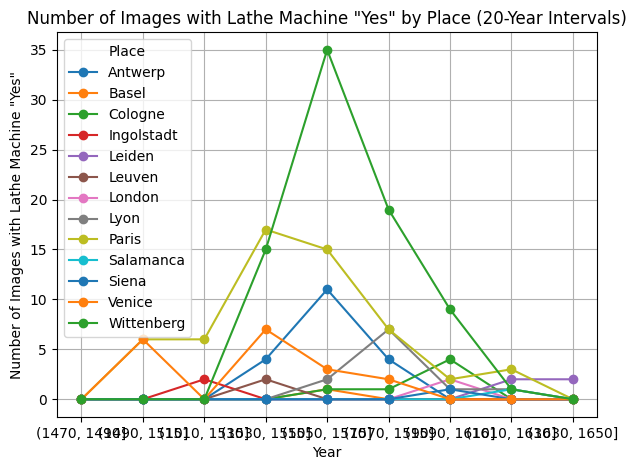

In [230]:
# Filter rows where 'lathe machine' is 'yes'
lathe_yes_df = new_df[new_df['lathe machine'] == 'yes']

# Define the range of years and the interval
start_year = 1470
end_year = 1650
year_interval = 20

# Create bins for 20-year intervals
bins = range(start_year, end_year + year_interval, year_interval)

# Group by 'place' and cut 'year' into bins, then count the number of images
grouped = lathe_yes_df.groupby(['place', pd.cut(lathe_yes_df['year'], bins)])['images'].count().reset_index()

# Pivot the data to have 'place' as columns and intervals as index
pivot_df = grouped.pivot(index='year', columns='place', values='images')

# Plot each 'place' as a line
pivot_df.plot(kind='line', marker='o')

# Customize plot labels and title
plt.xlabel('Year')
plt.ylabel('Number of Images with Lathe Machine "Yes"')
plt.title('Number of Images with Lathe Machine "Yes" by Place (20-Year Intervals)')

# Show the plot
plt.legend(title='Place')
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\nogas\AppData\Local\Temp\ipykernel_1244\597794791.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = lathe_yes_df.groupby(['place', pd.cut(lathe_yes_df['year'], bins)])['images'].count().reset_index()


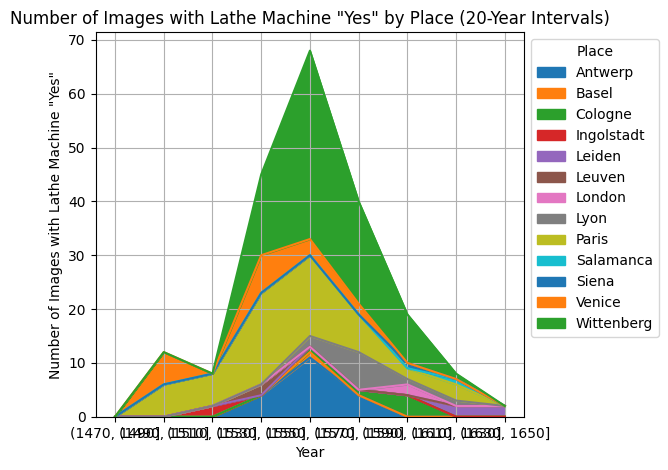

In [231]:
# Filter rows where 'lathe machine' is 'yes'
lathe_yes_df = new_df[new_df['lathe machine'] == 'yes']

# Define the range of years and the interval
start_year = 1470
end_year = 1650
year_interval = 20

# Create bins for 20-year intervals
bins = range(start_year, end_year + year_interval, year_interval)

# Group by 'place' and cut 'year' into bins, then count the number of images
grouped = lathe_yes_df.groupby(['place', pd.cut(lathe_yes_df['year'], bins)])['images'].count().reset_index()

# Pivot the data to have 'place' as columns and intervals as index
pivot_df = grouped.pivot(index='year', columns='place', values='images')

# Plot as an area plot for better visibility of cumulative counts over time
pivot_df.plot(kind='area', stacked=True)

# Customize plot labels and title
plt.xlabel('Year')
plt.ylabel('Number of Images with Lathe Machine "Yes"')
plt.title('Number of Images with Lathe Machine "Yes" by Place (20-Year Intervals)')

# Show the plot
plt.legend(title='Place', loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.show()


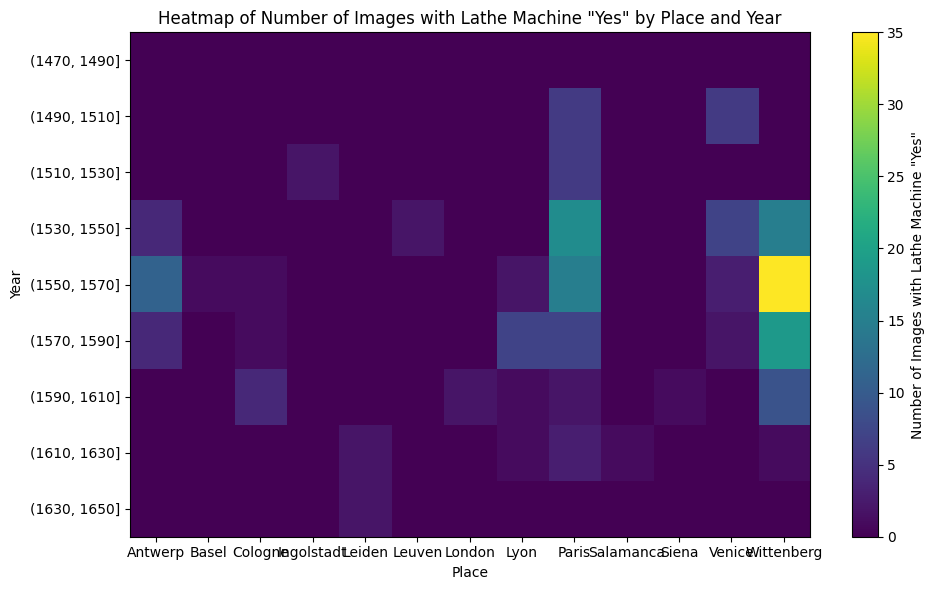

In [232]:
# Example continued from previous code

# Pivot the data to have 'place' as columns and 'year' as index
pivot_df = grouped.pivot(index='year', columns='place', values='images')

# Plot as a heatmap
plt.figure(figsize=(10, 6))  # Adjust size as needed
plt.imshow(pivot_df, cmap='viridis', aspect='auto', interpolation='nearest')

# Customize plot labels and title
plt.colorbar(label='Number of Images with Lathe Machine "Yes"')
plt.xlabel('Place')
plt.ylabel('Year')
plt.title('Heatmap of Number of Images with Lathe Machine "Yes" by Place and Year')

# Show the plot
plt.xticks(range(len(pivot_df.columns)), pivot_df.columns)
plt.yticks(range(len(pivot_df.index)), pivot_df.index)
plt.tight_layout()
plt.show()


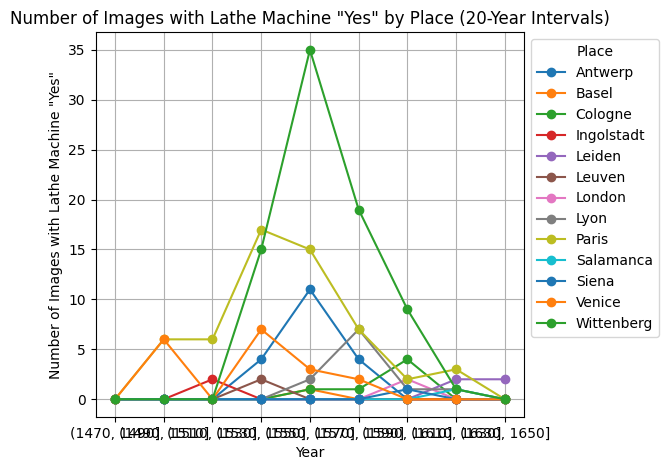

In [233]:
# Example continued from previous code

# Pivot the data to have 'place' as columns and intervals as index
pivot_df = grouped.pivot(index='year', columns='place', values='images')

# Plot as a line plot
pivot_df.plot(kind='line', marker='o')

# Customize plot labels and title
plt.xlabel('Year')
plt.ylabel('Number of Images with Lathe Machine "Yes"')
plt.title('Number of Images with Lathe Machine "Yes" by Place (20-Year Intervals)')

# Show the plot
plt.legend(title='Place', loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.show()


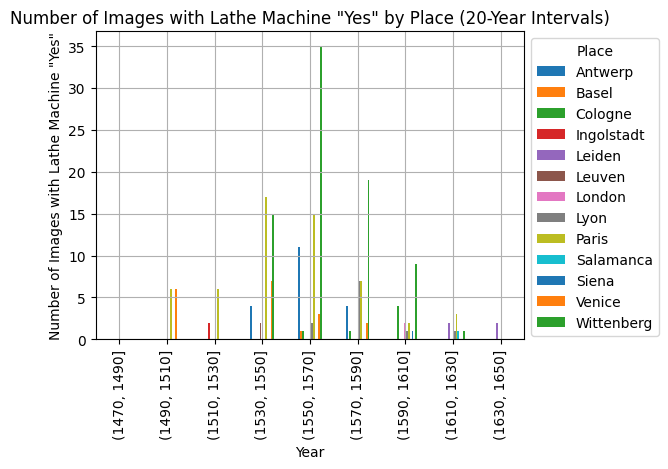

In [234]:
# Example continued from previous code

# Pivot the data to have 'place' as columns and intervals as index
pivot_df = grouped.pivot(index='year', columns='place', values='images')

# Plot as a grouped bar chart
pivot_df.plot(kind='bar')

# Customize plot labels and title
plt.xlabel('Year')
plt.ylabel('Number of Images with Lathe Machine "Yes"')
plt.title('Number of Images with Lathe Machine "Yes" by Place (20-Year Intervals)')

# Show the plot
plt.legend(title='Place', loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\nogas\AppData\Local\Temp\ipykernel_1244\1124047207.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = lathe_yes_df.groupby(['place', pd.cut(lathe_yes_df['year'], bins)])['images'].count().reset_index()


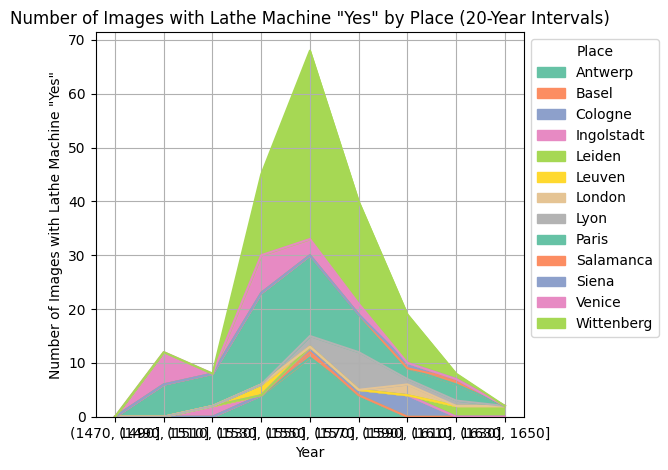

In [235]:
# Filter rows where 'lathe machine' is 'yes'
lathe_yes_df = new_df[new_df['lathe machine'] == 'yes']

# Define the range of years and the interval
start_year = 1470
end_year = 1650
year_interval = 20

# Create bins for 20-year intervals
bins = range(start_year, end_year + year_interval, year_interval)

# Group by 'place' and cut 'year' into bins, then count the number of images
grouped = lathe_yes_df.groupby(['place', pd.cut(lathe_yes_df['year'], bins)])['images'].count().reset_index()

# Pivot the data to have 'place' as columns and intervals as index
pivot_df = grouped.pivot(index='year', columns='place', values='images')

# Define a custom color palette with distinct colors for each city
colors = sns.color_palette('Set2', n_colors=len(pivot_df.columns))  # Using seaborn Set2 palette

# Plot as a stacked area plot with custom colors
pivot_df.plot(kind='area', stacked=True, color=colors)

# Customize plot labels and title
plt.xlabel('Year')
plt.ylabel('Number of Images with Lathe Machine "Yes"')
plt.title('Number of Images with Lathe Machine "Yes" by Place (20-Year Intervals)')

# Show the plot
plt.legend(title='Place', loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\nogas\AppData\Local\Temp\ipykernel_1244\3318878354.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = new_df.groupby(['lathe machine', pd.cut(new_df['year'], bins)])['images'].nunique().reset_index()


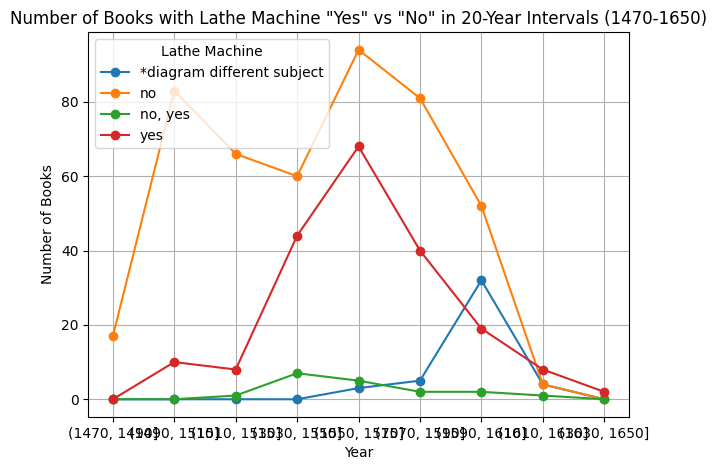

In [236]:
# Define the range of years and the interval
start_year = 1470
end_year = 1650
year_interval = 20

# Create bins for 20-year intervals
bins = range(start_year, end_year + year_interval, year_interval)

# Group by 'year' and 'lathe machine', cut 'year' into bins, count the number of unique books
grouped = new_df.groupby(['lathe machine', pd.cut(new_df['year'], bins)])['images'].nunique().reset_index()

# Pivot the data to have 'lathe machine' as columns and intervals as index
pivot_df = grouped.pivot(index='year', columns='lathe machine', values='images').fillna(0)

# Plot as a line plot
pivot_df.plot(kind='line', marker='o')

# Customize plot labels and title
plt.xlabel('Year')
plt.ylabel('Number of Books')
plt.title('Number of Books with Lathe Machine "Yes" vs "No" in 20-Year Intervals (1470-1650)')

# Show the plot
plt.legend(title='Lathe Machine', loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\nogas\AppData\Local\Temp\ipykernel_1244\824036416.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  unique_books_by_interval = new_df.groupby(pd.cut(new_df['year'], bins))['images'].nunique()


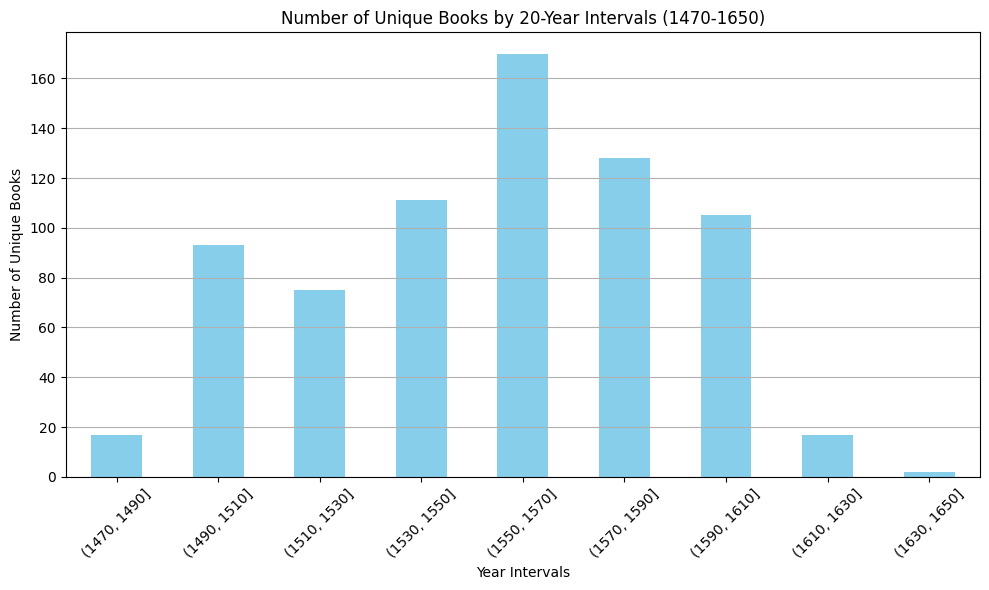

In [237]:
# Define the range of years and the interval
start_year = 1470
end_year = 1650
year_interval = 20

# Create bins for 20-year intervals
bins = range(start_year, end_year + year_interval, year_interval)

# Cut 'year' into bins and count the number of unique book values
unique_books_by_interval = new_df.groupby(pd.cut(new_df['year'], bins))['images'].nunique()

# Plot as a bar chart
plt.figure(figsize=(10, 6))  # Adjust size as needed
unique_books_by_interval.plot(kind='bar', color='skyblue')

# Customize plot labels and title
plt.xlabel('Year Intervals')
plt.ylabel('Number of Unique Books')
plt.title('Number of Unique Books by 20-Year Intervals (1470-1650)')

# Show the plot
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [238]:
path_to_csv = 'G:\\My Drive\\DataFiles\\booksSacrobosco.csv'

In [239]:
all_books = pd.read_csv(path_to_csv)

In [240]:
all_books

,subject,custom_identifier,label,format,date_text,year_published_from,year_published_to,place,book_type,coordinates,fingerprint,languages,dataset_labels,corpora_labels,authors,publishers,printers
0,http://sphaera.mpiwg-berlin.mpg.de/id/item/1ae...,1938,Ioannis de Sacrobosco anglici v. c. spaera mon...,Quarto,NaN,1472,1472,Ferrara,Compilation of texts,"44.835297, 11.619865",xeex qtme aeou zoca (C) 1472 (R),Latin,Sphaera Sacrobosco,S. Tractatus,"Sacrobosco, Johannes de","Belfortis, Andreas","Belfortis, Andreas"
1,http://sphaera.mpiwg-berlin.mpg.de/id/item/56d...,1939,Tractatum de Spera,Quarto,[1472],1472,1472,Venice,Only original text,"45.439722222, 12.331944444",eraq rade rili pono (C) 1472 (Q),Latin,Sphaera Sacrobosco,S. Tractatus,"Sacrobosco, Johannes de","de Argentina, Florentinus","de Argentina, Florentinus"
2,http://sphaera.mpiwg-berlin.mpg.de/id/item/250...,1609,Tractatum de spaera,Quarto,[1475-77],1475,1477,Venice,Only original text,"45.439722222, 12.331944444",u-ie dain ocue qaqu (C) 1477 (Q),Latin,Sphaera Sacrobosco,S. Tractatus,"Sacrobosco, Johannes de","Pietro, Filippo di","Pietro, Filippo di"
3,http://sphaera.mpiwg-berlin.mpg.de/id/item/50a...,1612,Sphera magistri Io. de Sacroboscho,Quarto,NaN,1478,1478,Milan,Only original text,"45.466944444, 9.19",t.am el*- udgi Nici (C) 1478 (R),Latin,Sphaera Sacrobosco,S. Tractatus,"Sacrobosco, Johannes de","Lavagna, Filippo da","Lavagna, Filippo da"
4,http://sphaera.mpiwg-berlin.mpg.de/id/item/6ae...,1940,Iohannis de Sacrobusto anglici viri clarissimi...,Quarto,NaN,1478,1478,Venice,Compilation of texts,"45.439722222, 12.331944444",umia odem laur nupu (C) 1478 (R),Latin,Sphaera Sacrobosco;Theoricae Gerard,S. Tractatus & Theoricae,"Sacrobosco, Johannes de","Renner, Franz","Renner, Franz"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354,http://sphaera.mpiwg-berlin.mpg.de/id/item/ce0...,2228,The Art of Navigation,Quarto,NaN,1630,1630,London,Adaption (treatise strongly influenced by orig...,"51.507222222, -0.1275","d,i- est- g.l- thTh (3) 1630 (A)",English,Sphaera Sacrobosco,S. Tractatus,"Eden, Richard;Tapp, John;Cortés, Martin","Tapp, John",Company Bernard Alsop & Thomas Fawcett
355,http://sphaera.mpiwg-berlin.mpg.de/id/item/6be...,1764,Sphaera Ioannis de Sacro Bosco,Octavo,NaN,1633,1633,Dijon,Compilation of texts,"47.323055555, 5.041944444",m.a- n-el *.um cepe (3) 1633 (R),Latin,Sphaera Sacrobosco,S. Tractatus,"Sacrobosco, Johannes de","Spirinx, Nicolas","Spirinx, Nicolas"
356,http://sphaera.mpiwg-berlin.mpg.de/id/item/9b2...,1799,Sphaera Iohannis de Sacro-Bosco,Octavo,NaN,1639,1639,Leiden,Annotated original text,"52.16, 4.49",o-r- ncnc uso- hisi (3) 1639 (R),Latin,Sphaera Sacrobosco,S. Tractatus,"Burgersdijk, Franco;Sacrobosco, Johannes de",Company Bonaventura Elsevier & Abraham Elsevier,Company Bonaventura Elsevier & Abraham Elsevier
357,http://sphaera.mpiwg-berlin.mpg.de/id/item/2ed...,1800,Sphaera Johannis de Sacro-Bosco,Octavo,NaN,1647,1647,Leiden,Annotated original text,"52.16, 4.49",uio- ncnc uso- hisi (3) 1647 (R),Latin,Sphaera Sacrobosco,S. Tractatus,"Burgersdijk, Franco;Sacrobosco, Johannes de",Company Bonaventura Elsevier & Abraham Elsevier,Company Bonaventura Elsevier & Abraham Elsevier


In [241]:
# Adding 'Sphere Definition Image' column
all_books['Sphere Definition Image'] = all_books['subject'].isin(new_df['book']).replace({True: 'yes', False: 'no'})

# Adding 'Lathe Machine Image' column
all_books['Lathe Machine Image'] = all_books['subject'].isin(new_df[new_df['lathe machine'] == 'yes']['book']).replace({True: 'yes', False: 'no'})

In [242]:
all_books

,subject,custom_identifier,label,format,date_text,year_published_from,year_published_to,place,book_type,coordinates,fingerprint,languages,dataset_labels,corpora_labels,authors,publishers,printers,Sphere Definition Image,Lathe Machine Image
0,http://sphaera.mpiwg-berlin.mpg.de/id/item/1ae...,1938,Ioannis de Sacrobosco anglici v. c. spaera mon...,Quarto,NaN,1472,1472,Ferrara,Compilation of texts,"44.835297, 11.619865",xeex qtme aeou zoca (C) 1472 (R),Latin,Sphaera Sacrobosco,S. Tractatus,"Sacrobosco, Johannes de","Belfortis, Andreas","Belfortis, Andreas",no,no
1,http://sphaera.mpiwg-berlin.mpg.de/id/item/56d...,1939,Tractatum de Spera,Quarto,[1472],1472,1472,Venice,Only original text,"45.439722222, 12.331944444",eraq rade rili pono (C) 1472 (Q),Latin,Sphaera Sacrobosco,S. Tractatus,"Sacrobosco, Johannes de","de Argentina, Florentinus","de Argentina, Florentinus",no,no
2,http://sphaera.mpiwg-berlin.mpg.de/id/item/250...,1609,Tractatum de spaera,Quarto,[1475-77],1475,1477,Venice,Only original text,"45.439722222, 12.331944444",u-ie dain ocue qaqu (C) 1477 (Q),Latin,Sphaera Sacrobosco,S. Tractatus,"Sacrobosco, Johannes de","Pietro, Filippo di","Pietro, Filippo di",no,no
3,http://sphaera.mpiwg-berlin.mpg.de/id/item/50a...,1612,Sphera magistri Io. de Sacroboscho,Quarto,NaN,1478,1478,Milan,Only original text,"45.466944444, 9.19",t.am el*- udgi Nici (C) 1478 (R),Latin,Sphaera Sacrobosco,S. Tractatus,"Sacrobosco, Johannes de","Lavagna, Filippo da","Lavagna, Filippo da",no,no
4,http://sphaera.mpiwg-berlin.mpg.de/id/item/6ae...,1940,Iohannis de Sacrobusto anglici viri clarissimi...,Quarto,NaN,1478,1478,Venice,Compilation of texts,"45.439722222, 12.331944444",umia odem laur nupu (C) 1478 (R),Latin,Sphaera Sacrobosco;Theoricae Gerard,S. Tractatus & Theoricae,"Sacrobosco, Johannes de","Renner, Franz","Renner, Franz",no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354,http://sphaera.mpiwg-berlin.mpg.de/id/item/ce0...,2228,The Art of Navigation,Quarto,NaN,1630,1630,London,Adaption (treatise strongly influenced by orig...,"51.507222222, -0.1275","d,i- est- g.l- thTh (3) 1630 (A)",English,Sphaera Sacrobosco,S. Tractatus,"Eden, Richard;Tapp, John;Cortés, Martin","Tapp, John",Company Bernard Alsop & Thomas Fawcett,no,no
355,http://sphaera.mpiwg-berlin.mpg.de/id/item/6be...,1764,Sphaera Ioannis de Sacro Bosco,Octavo,NaN,1633,1633,Dijon,Compilation of texts,"47.323055555, 5.041944444",m.a- n-el *.um cepe (3) 1633 (R),Latin,Sphaera Sacrobosco,S. Tractatus,"Sacrobosco, Johannes de","Spirinx, Nicolas","Spirinx, Nicolas",no,no
356,http://sphaera.mpiwg-berlin.mpg.de/id/item/9b2...,1799,Sphaera Iohannis de Sacro-Bosco,Octavo,NaN,1639,1639,Leiden,Annotated original text,"52.16, 4.49",o-r- ncnc uso- hisi (3) 1639 (R),Latin,Sphaera Sacrobosco,S. Tractatus,"Burgersdijk, Franco;Sacrobosco, Johannes de",Company Bonaventura Elsevier & Abraham Elsevier,Company Bonaventura Elsevier & Abraham Elsevier,yes,yes
357,http://sphaera.mpiwg-berlin.mpg.de/id/item/2ed...,1800,Sphaera Johannis de Sacro-Bosco,Octavo,NaN,1647,1647,Leiden,Annotated original text,"52.16, 4.49",uio- ncnc uso- hisi (3) 1647 (R),Latin,Sphaera Sacrobosco,S. Tractatus,"Burgersdijk, Franco;Sacrobosco, Johannes de",Company Bonaventura Elsevier & Abraham Elsevier,Company Bonaventura Elsevier & Abraham Elsevier,yes,yes


C:\Users\nogas\AppData\Local\Temp\ipykernel_1244\3489387085.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_books = all_books.groupby(pd.cut(all_books['year_published_from'], bins=years)).agg({'subject': 'nunique'}).rename(columns={'subject': 'Total Books'})
C:\Users\nogas\AppData\Local\Temp\ipykernel_1244\3489387085.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sphere_books = all_books[all_books['Sphere Definition Image'] == 'yes'].groupby(pd.cut(all_books['year_published_from'], bins=years)).agg({'subject': 'nunique'}).rename(columns={'subject': 'Sphere Definition Image'})
C:\Users\nogas\App

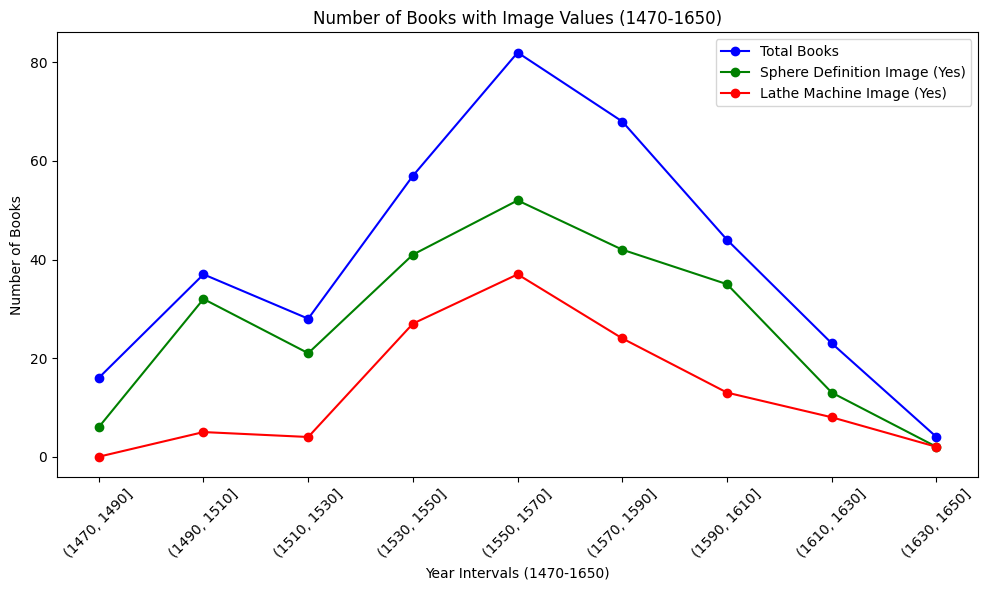

In [243]:
# Define the years range for 1470 to 1650 in twenty-year intervals
years = range(1470, 1651, 20)

# Group by year and count unique subjects
total_books = all_books.groupby(pd.cut(all_books['year_published_from'], bins=years)).agg({'subject': 'nunique'}).rename(columns={'subject': 'Total Books'})

# Count books with 'Sphere Definition Image' as 'yes'
sphere_books = all_books[all_books['Sphere Definition Image'] == 'yes'].groupby(pd.cut(all_books['year_published_from'], bins=years)).agg({'subject': 'nunique'}).rename(columns={'subject': 'Sphere Definition Image'})

# Count books with 'Lathe Machine Image' as 'yes'
lathe_books = all_books[all_books['Lathe Machine Image'] == 'yes'].groupby(pd.cut(all_books['year_published_from'], bins=years)).agg({'subject': 'nunique'}).rename(columns={'subject': 'Lathe Machine Image'})

# Plotting
plt.figure(figsize=(10, 6))

plt.plot(total_books.index.astype(str), total_books['Total Books'], marker='o', linestyle='-', color='b', label='Total Books')
plt.plot(sphere_books.index.astype(str), sphere_books['Sphere Definition Image'], marker='o', linestyle='-', color='g', label='Sphere Definition Image (Yes)')
plt.plot(lathe_books.index.astype(str), lathe_books['Lathe Machine Image'], marker='o', linestyle='-', color='r', label='Lathe Machine Image (Yes)')

plt.xlabel('Year Intervals (1470-1650)')
plt.ylabel('Number of Books')
plt.title('Number of Books with Image Values (1470-1650)')
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

In [251]:
#create a df called lathe_macine_rep with images that have a lathe machine yes value. for each image: part id, part type, book, year, place, publisher

# Filter df_sphere_definition for rows where lathe machine is 'yes'
filtered_labels = df_sphere_definition[df_sphere_definition['lathe machine'] == 'yes']['label'].unique()

# Filter df_images where cluster_name matches the filtered labels
filtered_images = df[df['cluster_name'].isin(filtered_labels)]

# Create a new DataFrame with selected columns including 'images'
result_df = filtered_images[['images', 'cluster_name', 'book', 'year', 'place', 'part_or_adaption', 'part_type', 'publishers']]


In [252]:
result_df

,images,cluster_name,book,year,place,part_or_adaption,part_type,publishers
154,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,SIL_00206,http://sphaera.mpiwg-berlin.mpg.de/id/item/0a7...,1494,Paris,http://sphaera.mpiwg-berlin.mpg.de/id/adaption...,adaption_100,"Hopyl, Wolfgang"
155,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,SIL_00452,http://sphaera.mpiwg-berlin.mpg.de/id/item/0a7...,1494,Paris,http://sphaera.mpiwg-berlin.mpg.de/id/adaption...,adaption_100,"Hopyl, Wolfgang"
1232,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,SIL_00609,http://sphaera.mpiwg-berlin.mpg.de/id/item/a62...,1543,Antwerp,http://sphaera.mpiwg-berlin.mpg.de/id/adaption...,adaption_100,"Richard, Jean"
1288,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,SIL_01811,http://sphaera.mpiwg-berlin.mpg.de/id/item/f27...,1545,Venice,http://sphaera.mpiwg-berlin.mpg.de/id/part/c61...,100,"Sessa I., Melchiorre"
1325,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,SIL_00240,http://sphaera.mpiwg-berlin.mpg.de/id/item/bed...,1545,Paris,http://sphaera.mpiwg-berlin.mpg.de/id/adaption...,adaption_100,"Richard, Guillaume"
...,...,...,...,...,...,...,...,...
20871,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,SIL_01811,http://sphaera.mpiwg-berlin.mpg.de/id/item/921...,1555,Antwerp,http://sphaera.mpiwg-berlin.mpg.de/id/part/bfb...,influenced_100,"Richard, Jean"
21004,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,SIL_03519,http://sphaera.mpiwg-berlin.mpg.de/id/item/e70...,1599,London,http://sphaera.mpiwg-berlin.mpg.de/id/part/1e2...,influenced_100,"Jaggard, William"
21006,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,SIL_03576,http://sphaera.mpiwg-berlin.mpg.de/id/item/e70...,1599,London,http://sphaera.mpiwg-berlin.mpg.de/id/part/1e2...,influenced_100,"Jaggard, William"
21078,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,SIL_01618,http://sphaera.mpiwg-berlin.mpg.de/id/item/af4...,1582,Antwerp,http://sphaera.mpiwg-berlin.mpg.de/id/adaption...,adaption_100,"Bellère, Jean"


C:\Users\nogas\AppData\Local\Temp\ipykernel_1244\4044047945.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_df.loc[:, 'year_bin'] = pd.cut(result_df['year'], bins=bins, right=False)


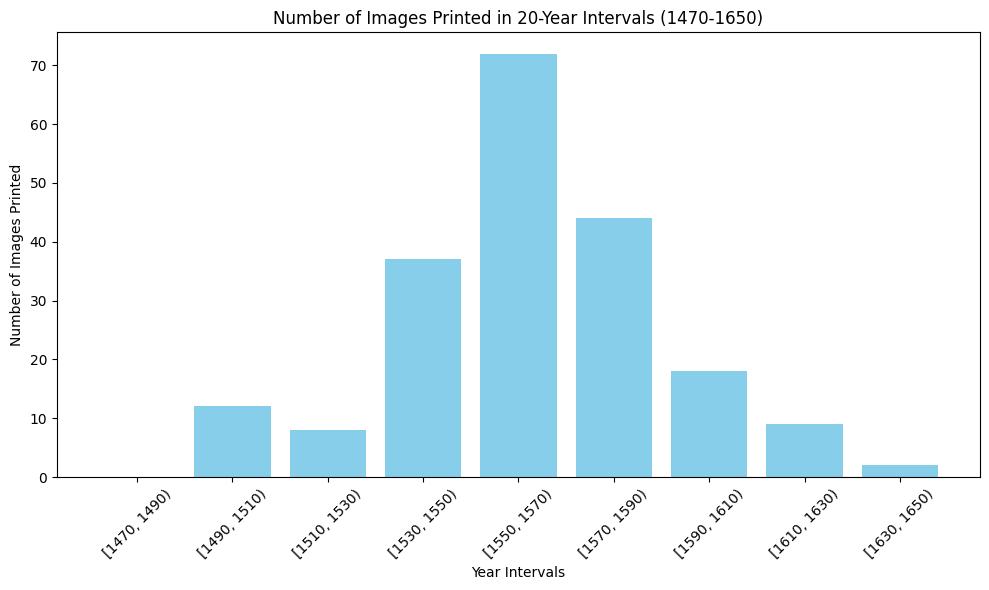

In [253]:
# Create bins for 20-year intervals from 1470 to 1650
bins = range(1470, 1651, 20)

# Use .loc to avoid SettingWithCopyWarning and observed=False for FutureWarning
result_df.loc[:, 'year_bin'] = pd.cut(result_df['year'], bins=bins, right=False)
image_counts = result_df.groupby('year_bin', observed=False)['images'].count()

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(image_counts.index.astype(str), image_counts.values, width=0.8, align='center', color='skyblue')
plt.xlabel('Year Intervals')
plt.ylabel('Number of Images Printed')
plt.title('Number of Images Printed in 20-Year Intervals (1470-1650)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\nogas\AppData\Local\Temp\ipykernel_1244\1625392057.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  image_counts_1 = result_df.groupby(['year_bin', 'place']).size().unstack(fill_value=0)


AttributeError: 'Series' object has no attribute 'columns'

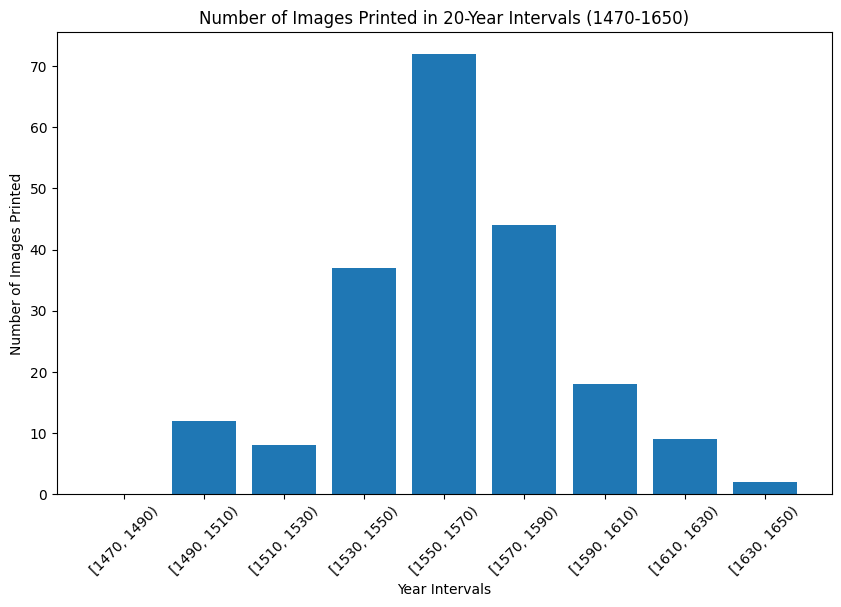

In [254]:
# Aggregate by year_bin and place
image_counts_1 = result_df.groupby(['year_bin', 'place']).size().unstack(fill_value=0)

# Plotting stacked bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(image_counts.index.astype(str), image_counts.values.T, width=0.8, align='center')

# Customizing the plot
plt.xlabel('Year Intervals')
plt.ylabel('Number of Images Printed')
plt.title('Number of Images Printed in 20-Year Intervals (1470-1650)')
plt.xticks(rotation=45)
plt.legend(image_counts.columns)  # Adding legend for city names
plt.tight_layout()
plt.show()